# Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# Business Goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Regression

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

Importing the dataset

In [2]:
dataset = pd.read_csv('CarPrice_Assignment.csv')

# Data Analysis

In [3]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Droping Car Id column

In [4]:
df=dataset.drop("car_ID",axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

Checking for null values

In [6]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Checking Duplicate Value

In [7]:
df.duplicated().sum()

0

Correlation

<AxesSubplot:>

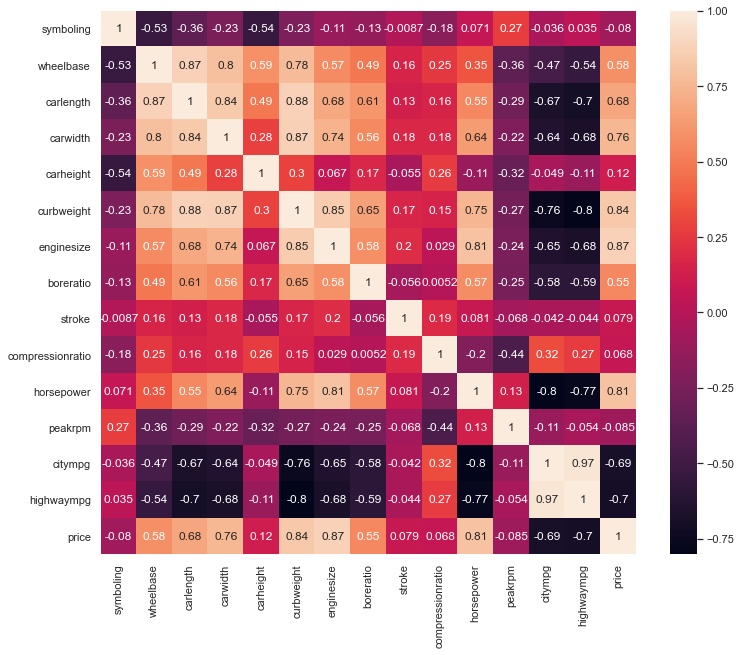

In [8]:
sn.set(rc={'figure.figsize':(12,10)})   #To change figure size in seaborn
sn.heatmap(df.corr(),annot=True)

In [9]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
def categories():
    for i in range(len(df.columns)):
        if df[df.columns[i]].nunique():
            if df[df.columns[i]].nunique() <= 7: 
                print("Number of Unique categories in",df.columns[i],df[df.columns[i]].nunique())
categories()

Number of Unique categories in symboling 6
Number of Unique categories in fueltype 2
Number of Unique categories in aspiration 2
Number of Unique categories in doornumber 2
Number of Unique categories in carbody 5
Number of Unique categories in drivewheel 3
Number of Unique categories in enginelocation 2
Number of Unique categories in enginetype 7
Number of Unique categories in cylindernumber 7


Creating Dummies

In [11]:
dummies_df = pd.get_dummies(df[["symboling","fueltype","aspiration","doornumber","carbody", "drivewheel", 
                                "enginelocation", "enginetype", "cylindernumber"]])
dummies_df

,symboling,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,2,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
201,-1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
202,-1,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
203,-1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
final_df = pd.concat([df, dummies_df],axis=1)
final_df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,1,0,0,0,0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,0,0,0,0,0,1,0,0,0,0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,0,1,0,0,0,0,1,0,0,0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,0,0,0,0,0,1,0,0,0,0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,1,0,0,0,0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,1,0,0,0,0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,0,1,0,0,0,0,1,0,0,0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,0,0,0,0,0,0,1,0,0,0


Dropiing Un-necessary columns

In [13]:
final_df = final_df.drop(["CarName","symboling","fueltype","aspiration","doornumber","carbody", "drivewheel", 
                          "enginelocation", "enginetype", "cylindernumber","fuelsystem"],axis=1)
final_df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,1,0,0,0,0,1,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,1,0,0,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,1,0,0,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,1,0,0,0,0,1,0,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,0,1,0,0,0


In [14]:
final_df.shape

(205, 44)

Seperating Dependent and Independent Variables

In [70]:
X = final_df.drop(columns=["price"], axis=1)
y=final_df["price"]

Splitting data into Training and Testing Set

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Multiple Linear Regression 

Applying  Multiple Linear Regression Model On Training Set

In [73]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

Predecting Testing Set

In [74]:
y_pred = regressor.predict(X_test)

In [75]:
d1=pd.DataFrame({"Actual":y_test,"Predcted":y_pred})
d1

,Actual,Predcted
52,6795.0,5972.901858
181,15750.0,20142.390866
5,15250.0,15491.750221
18,5151.0,-969.567590
188,9995.0,10109.511333
170,11199.0,12529.403251
76,5389.0,6390.793544
154,7898.0,6337.844668
104,17199.0,16834.451092
33,6529.0,7216.181853


Evaluating Model Performance

In [76]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8572106251403042

# Decision Tree Regressor

Applying Decision Tree Model On Training Set

In [77]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

Predecting Testing Set

In [78]:
y_pred= regressor.predict(X_test)

In [79]:
d2=pd.DataFrame({"Actual":y_test,"Predcted":y_pred})
d2

,Actual,Predcted
52,6795.0,6095.0
181,15750.0,16558.0
5,15250.0,11245.0
18,5151.0,5399.0
188,9995.0,9960.0
170,11199.0,17669.0
76,5389.0,5572.0
154,7898.0,6918.0
104,17199.0,18399.0
33,6529.0,7129.0


Evaluating Model Performance

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8831572670211374

# Random Forest Regressor

Applying Random Forest Model On Training Set

In [81]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

Predecting Testing Set

In [82]:
y_pred= regressor.predict(X_test)

In [83]:
d3=pd.DataFrame({"Actual":y_test,"Predcted":y_pred})
d3

,Actual,Predcted
52,6795.0,5924.4000
181,15750.0,16763.9000
5,15250.0,14287.7000
18,5151.0,5985.1000
188,9995.0,9542.3000
170,11199.0,15642.2000
76,5389.0,5929.7000
154,7898.0,7519.1000
104,17199.0,17975.2000
33,6529.0,7074.2000


Evaluating Model Performance

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9048344412519714

# Following are models based on their R2 score

1. Random Forest Regression
2. Decision Treee Regression
3. Linear Regression